### Values

In [189]:
ITERATIONS = 1000
TEST_SIZE = 0.3
TEXT_FEATURES = ['incident_classification']
NUMERIC_FEATURES = ['engines_assigned_quantity', 'ladders_assigned_quantity']
# FEATURES = ['engines_assigned_quantity', 'ladders_assigned_quantity', 'alarm_source_description_tx']
TARGET_ATTRIBUTE = 'other_units_assigned_quantity'

### Read Json and validate Data

In [190]:
import pandas as pd

df = pd.read_json('/Users/loic.doerr/dev/ny-emergency-ai/data/fire-incidents/interims.json')
df.dropna(inplace=True)

### Train Models

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer 

text_features = df[TEXT_FEATURES]
numeric_features = df[NUMERIC_FEATURES]

# features = df[FEATURES]
target = df[TARGET_ATTRIBUTE]

vect = CountVectorizer()

flattened_list = []

for sublist in text_features[TEXT_FEATURES].values:
  for num in sublist:
    flattened_list.append(num)

print('Flattend_List', flattened_list)
newData = vect.fit(flattened_list)
newData2 = vect.fit_transform(flattened_list)

print('NewData', newData)
print('NewData2', newData2)

text_features[TEXT_FEATURES] = newData2

print('123', vect.get_feature_names_out())

print('Test:', vect.vocabulary_.get(u'factory'))

# df = pd.DataFrame(dtm.toarray(),columns=vect.get_feature_names()) 

# print(vect.get_feature_names())

# hashed_values = []

# for item in text_features['incident_classification']:
#   hash_object = hashlib.sha256()
  
#   # Update the hash object with the text encoded to bytes
#   hash_object.update(item.encode('utf-8'))
  
#   # Get the hexadecimal digest of the hash
#   hex_dig = hash_object.hexdigest()
  
#   # Convert the hexadecimal digest to an integer
#   numeric_hash = int(hex_dig, 16)
#   hashed_values.append(numeric_hash)

# text_features['incident_classification'] = hashed_values

print(text_features)

features = pd.concat([numeric_features, text_features], axis=1)

# print('text_features', text_features)

# vectorizer = CountVectorizer()
# text_features_transformed = vectorizer.fit_transform(features)
# print('Shape', text_features_transformed.shape)

# print(vectorizer.vocabulary_.get(u'test'))

# print('text_features_transformed', text_features_transformed.toarray())

# text_feature_df = pd.DataFrame(text_features_transformed.toarray())
# features = pd.concat([numeric_features, text_feature_df], axis=1)

# features = pd.get_dummies(features)

models = []
errors = []

for iteration in range(ITERATIONS):
  features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=TEST_SIZE, random_state=iteration) 
  model = LinearRegression()
  model.fit(features_train, target_train)
  target_pred = model.predict(features_test)
  mse = metrics.mean_squared_error(target_test, target_pred)
  models.append(model)
  errors.append(mse)

print('Errors', errors)

Flattend_List ['Medical - Breathing / Ill or Sick', 'Medical - Serious Life Threatening', 'Medical - Breathing / Ill or Sick', 'Medical - No PT Contact EMS is Onscene', 'Utility Emergency - Gas', 'Medical - No PT Contact EMS is Onscene', 'Automobile Fire', "Multiple Dwelling 'A' - Compactor fire", 'Medical - Breathing / Ill or Sick', 'Medical - Breathing / Ill or Sick', 'Medical - Breathing / Ill or Sick', 'Medical - Serious Life Threatening', 'Elevator Emergency - Unoccupied', 'Medical MFA - EMS Link', 'Medical - Breathing / Ill or Sick', 'Medical - Breathing / Ill or Sick', 'Medical - Serious Life Threatening', 'Assist Civilian - Non-Medical', 'Odor - Other Than Smoke', 'Medical - Breathing / Ill or Sick', "Multiple Dwelling 'A' - Food on the stove fire", 'Medical - Breathing / Ill or Sick', 'Assist Civilian - Non-Medical', 'Medical - No PT Contact EMS is Onscene', 'Medical - No PT Contact EMS is Onscene', 'Utility Emergency - Gas', 'Automobile Fire', 'Medical - Breathing / Ill or Si

/var/folders/jc/4tg2kq2n5sl5q7m9gbm6g6h80000gn/T/ipykernel_59135/372060222.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_features[TEXT_FEATURES] = newData2


ValueError: setting an array element with a sequence.

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer 

text_features = df[['starfire_incident_id'] + TEXT_FEATURES]
numeric_features = df[['starfire_incident_id'] + NUMERIC_FEATURES]

print(len(text_features))
print(len(numeric_features))

# features = df[FEATURES]

vect = CountVectorizer()

flattened_list = []

# print(text_features)
# print(numeric_features)

# for sublist in text_features[TEXT_FEATURES].values:
#   for num in sublist:
#     flattened_list.append(num)

# tokenized_text = vect.fit_transform(flattened_list)

text_features = vect.fit_transform(text_features[TEXT_FEATURES].apply(lambda x: ' '.join(x), axis=1))

print('text_features', text_features)

text_features_df = pd.DataFrame.sparse.from_spmatrix(text_features)

print('text_features_df', text_features_df)

# features = pd.concat([numeric_features, text_features_df], axis=1)

# features = pd.merge(numeric_features, text_features_df)

print('LenFeatures', len(features))
print('LenTarget', len(target))

target = df[TARGET_ATTRIBUTE]

models = []
errors = []

for iteration in range(ITERATIONS):
  features_train, features_test, target_train, target_test = train_test_split(text_features_df, target, test_size=TEST_SIZE, random_state=iteration) 
  model = LinearRegression()
  model.fit(features_train, target_train)
  target_pred = model.predict(features_test)
  mse = metrics.mean_squared_error(target_test, target_pred)
  models.append(model)
  errors.append(mse)

print('Errors', errors)

22618
22618
text_features   (0, 49)	1
  (0, 9)	1
  (0, 40)	1
  (0, 61)	1
  (0, 75)	1
  (1, 49)	1
  (1, 74)	1
  (1, 44)	1
  (1, 86)	1
  (2, 49)	1
  (2, 9)	1
  (2, 40)	1
  (2, 61)	1
  (2, 75)	1
  (3, 49)	1
  (3, 53)	1
  (3, 68)	1
  (3, 20)	1
  (3, 32)	1
  (3, 43)	1
  (3, 60)	1
  (4, 93)	1
  (4, 31)	1
  (4, 38)	1
  (5, 49)	1
  :	:
  (22611, 0)	1
  (22611, 1)	1
  (22612, 62)	1
  (22612, 94)	1
  (22612, 3)	1
  (22613, 49)	1
  (22613, 7)	1
  (22613, 15)	1
  (22613, 54)	1
  (22614, 49)	1
  (22614, 9)	1
  (22614, 40)	1
  (22614, 61)	1
  (22614, 75)	1
  (22615, 31)	1
  (22615, 30)	1
  (22615, 56)	1
  (22616, 31)	1
  (22616, 30)	1
  (22616, 56)	1
  (22617, 49)	1
  (22617, 9)	1
  (22617, 40)	1
  (22617, 61)	1
  (22617, 75)	1
text_features_df        0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  \
0       0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   
1       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
2       0   0   0   0   0

KeyboardInterrupt: 

### Plot Models

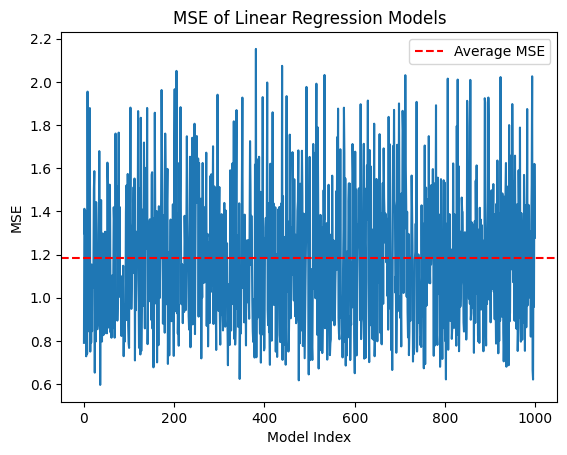

In [192]:
import matplotlib.pyplot as plt
import numpy as np

average_error = np.mean(errors)

plt.plot(errors)
plt.axhline(average_error, color='r', linestyle='--', label='Average MSE')
plt.xlabel('Model Index')
plt.ylabel('MSE')
plt.title('MSE of Linear Regression Models')
plt.legend()
plt.show()

### Get Best Model

In [193]:
best_model_index = errors.index(min(errors))
best_model = models[best_model_index]

print('Best Model MSE', errors[best_model_index])

Best Model MSE 0.5961732141093259


### Save Model

In [194]:
import joblib

joblib.dump(best_model, f'../models/model.pkl')

categories = {col: list(features[col].unique()) for col in features.columns}
joblib.dump(categories, f'../models/categories.pkl')

['../models/categories.pkl']

### Get Feature Importances

Higher = more Important

In [195]:
feature_names = features.columns

feature_importances = best_model.coef_

feature_dict = dict(zip(feature_names, feature_importances))

for feature, importance in feature_dict.items():
  print(f'Feature: {feature}, Importance: {importance}')

Feature: engines_assigned_quantity, Importance: -3.441291328400783e-157
Feature: ladders_assigned_quantity, Importance: 0.0
Feature: incident_classification, Importance: 1.2745219682514313e-78
